In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdana')

## Методы машинного обучения с учителем
### Классификация и регрессия

### Обобщающая способность, переобучение и недообучение

![model_complexity](images/overfitting_underfitting_cartoon.png)

##### Взаимосвязь между сложностью модели и размером набора данных

### Алгоритмы машинного обучения с учителем

форма массива X: (26, 2)


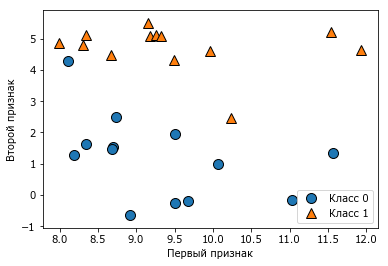

In [2]:
# генерируем набор данных
X, y = mglearn.datasets.make_forge()
# строим график для набора данных
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("форма массива X: {}".format(X.shape))

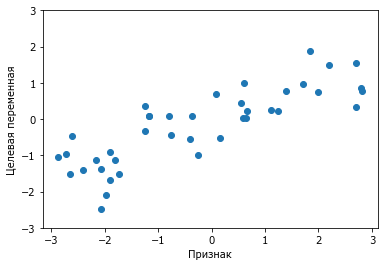

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))

Ключи cancer(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
print("Форма массива data для набора cancer: {}".format(cancer.data.shape))

Форма массива data для набора cancer: (569, 30)


In [6]:
print("Количество примеров для каждого класса:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}


In [7]:
print("Имена признаков:\n{}".format(cancer.feature_names))

Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("форма массива data для набора boston: {}".format(boston.data.shape))

форма массива data для набора boston: (506, 13)


In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("форма массива X: {}".format(X.shape))

форма массива X: (506, 104)


### Метод k ближайших соседей
#### Классификация с помощью k соседей

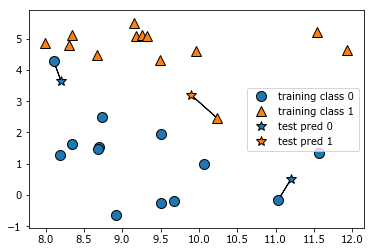

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

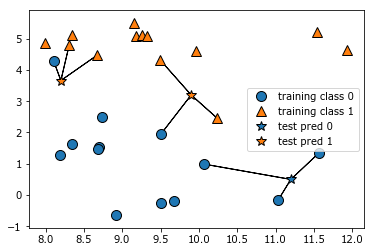

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]


In [16]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Правильность на тестовом наборе: 0.86


#### Анализ KNeighborsClassifier

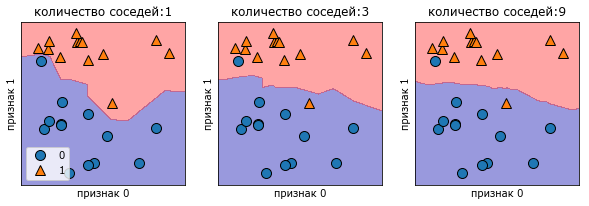

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
# создаем объект-классификатор и подгоняем в одной строке
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("количество соседей:{}".format(n_neighbors))
    ax.set_xlabel("признак 0")
    ax.set_ylabel("признак 1")
axes[0].legend(loc=3)

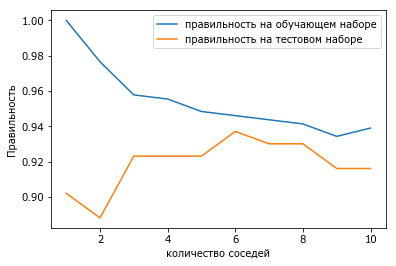

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # строим модель
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # записываем правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train, y_train))
    # записываем правильность на тестовом наборе
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

#### Регрессия k ближайших соседей

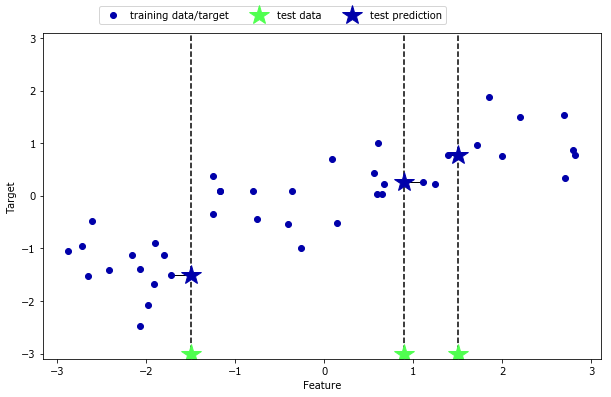

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

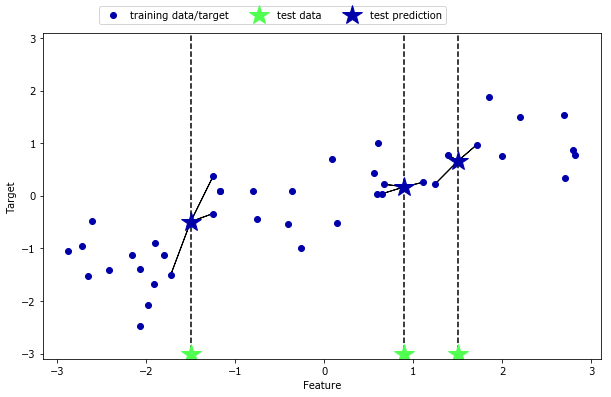

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [22]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [23]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: 0.83


#### Анализ модели KNeighborsRegressor

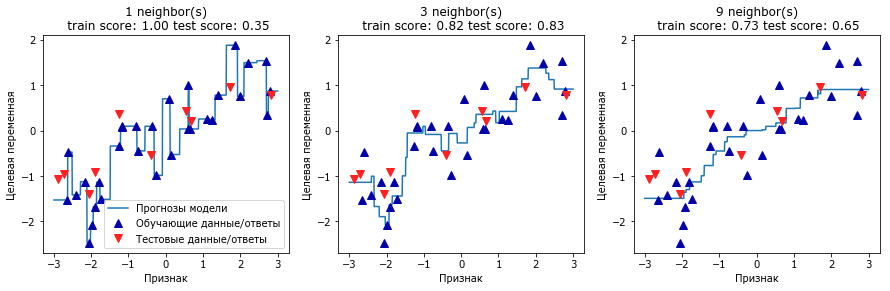

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # получаем прогнозы, используя 1, 3, и 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
                "Тестовые данные/ответы"], loc="best")

#### Преимущества, недостатки и параметры

### Линейные модели
#### Линейные модели для регрессии
\begin{align*}
\end{align*}

w[0]: 0.393906  b: -0.031804


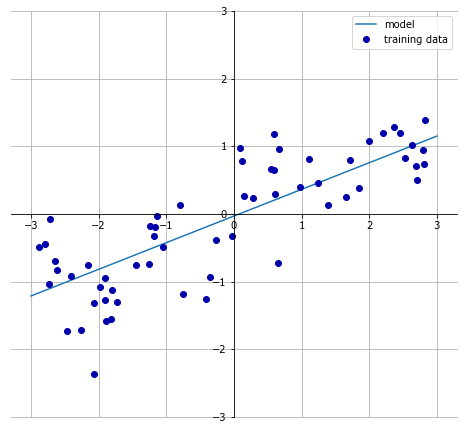

In [25]:
mglearn.plots.plot_linear_regression_wave()

#### Линейная регрессия (обычный метод наименьших квадратов)

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
print("регрессионный коэффициент: {}".format(lr.coef_))
print("константа: {}".format(lr.intercept_))

регрессионный коэффициент: [ 0.39390555]
константа: -0.031804343026759746


In [28]:
print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.67
R-квадрат на тестовом наборе: 0.66


In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.95
R-квадрат на тестовом наборе: 0.61


#### Гребневая регрессия

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.89
R-квадрат на тестовом наборе: 0.75


In [32]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.79
R-квадрат на тестовом наборе: 0.64


In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.93
R-квадрат на тестовом наборе: 0.77


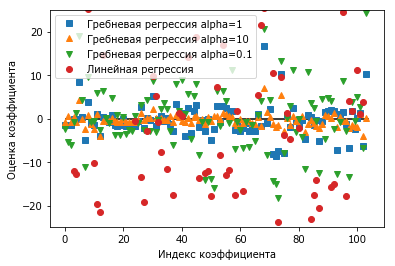

In [34]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")

plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

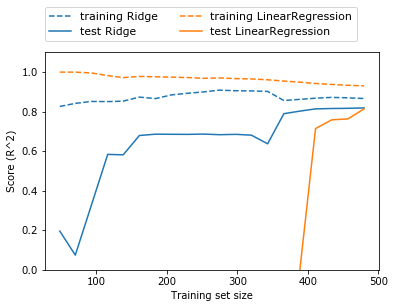

In [35]:
mglearn.plots.plot_ridge_n_samples()

#### Лассо

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("R-квадрат на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

R-квадрат на обучающем наборе: 0.29
R-квадрат на контрольном наборе: 0.21
Количество использованных признаков: 4


In [37]:
# мы увеличиваем значение "max_iter",
# иначе модель выдаст предупреждение, что нужно увеличить max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

R-квадрат на обучающем наборе: 0.90
R-квадрат на тестовом наборе: 0.77
Количество использованных признаков: 33


In [38]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

R-квадрат на обучающем наборе: 0.95
R-квадрат на тестовом наборе: 0.64
Количество использованных признаков: 94


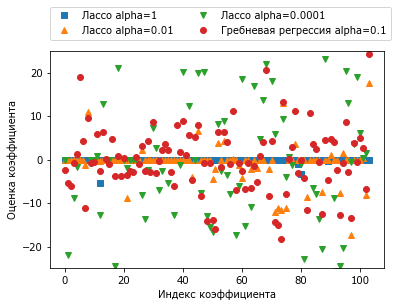

In [39]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента") 

#### Линейные модели для классификации

\begin{align*}
\end{align*}

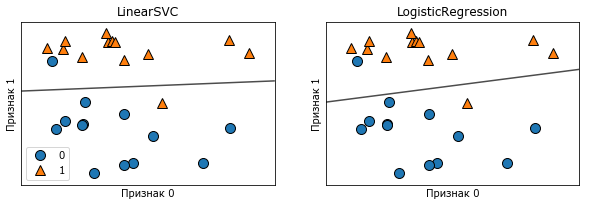

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
axes[0].legend()

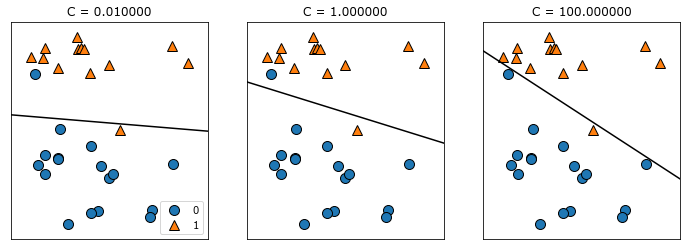

In [41]:
mglearn.plots.plot_linear_svc_regularization()

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.955
Правильность на тестовом наборе: 0.958


In [43]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.972
Правильность на тестовом наборе: 0.965


In [44]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.934
Правильность на тестовом наборе: 0.930


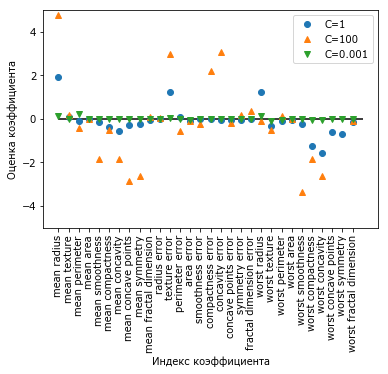

In [45]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

Правильность на обучении для логрегрессии l1 с C=0.001: 0.91
Правильность на тесте для логрегрессии l1 с C=0.001: 0.92
Правильность на обучении для логрегрессии l1 с C=1.000: 0.96
Правильность на тесте для логрегрессии l1 с C=1.000: 0.96
Правильность на обучении для логрегрессии l1 с C=100.000: 0.99
Правильность на тесте для логрегрессии l1 с C=100.000: 0.98


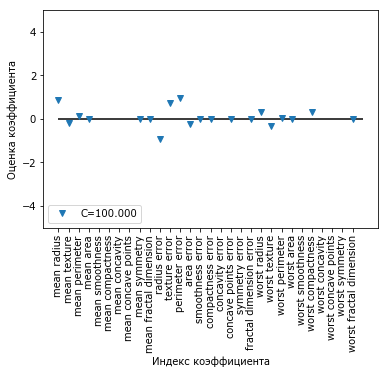

In [46]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Правильность на обучении для логрегрессии l1 с C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Правильность на тесте для логрегрессии l1 с C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))

plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

plt.ylim(-5, 5)
plt.legend(loc=3)

#### Линейные модели для мультиклассовой классификации
\begin{align*}
\end{align*}

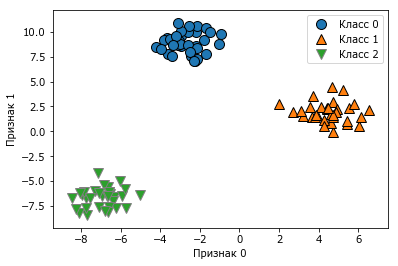

In [47]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])

In [48]:
linear_svm = LinearSVC().fit(X, y)
print("Форма коэффициента: ", linear_svm.coef_.shape)
print("Форма константы: ", linear_svm.intercept_.shape)

Форма коэффициента:  (3, 2)
Форма константы:  (3,)


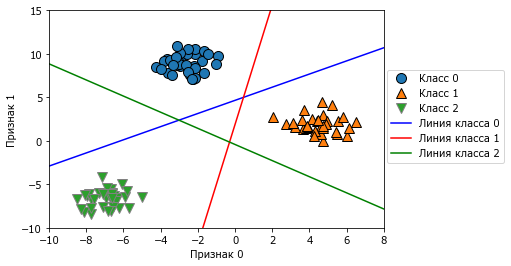

In [49]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, 
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
            'Линия класса 2'], loc=(1.01, 0.3))

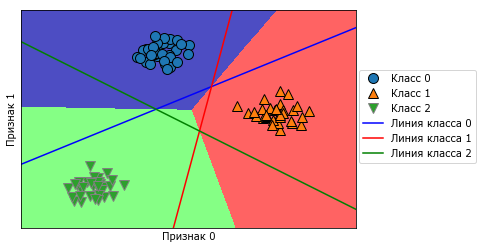

In [50]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
            'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

#### Преимущества, недостатки и параметры

In [51]:
# создаем экземпляр модели и подгоняем его в одной строке
logreg = LogisticRegression().fit(X_train, y_train)

In [52]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [53]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

### Наивные байесовские классификаторы

In [54]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [55]:
counts = {}
for label in np.unique(y):
    # итерируем по каждому классу
    # подсчитываем (суммируем) элементы 1 по признаку
    counts[label] = X[y == label].sum(axis=0)
print("Частоты признаков:\n{}".format(counts))

Частоты признаков:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### Преимущества, недостатки и параметры

### Деревья решений

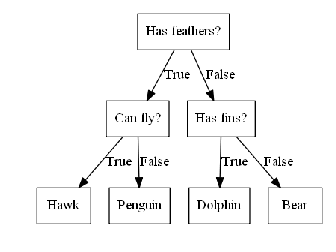

In [56]:
mglearn.plots.plot_animal_tree()

#### Построение деревьев решений

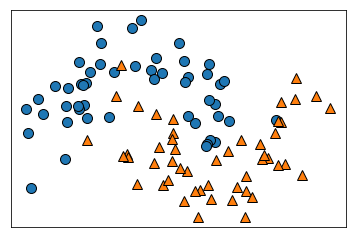

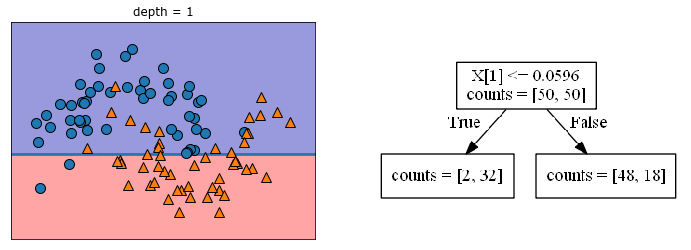

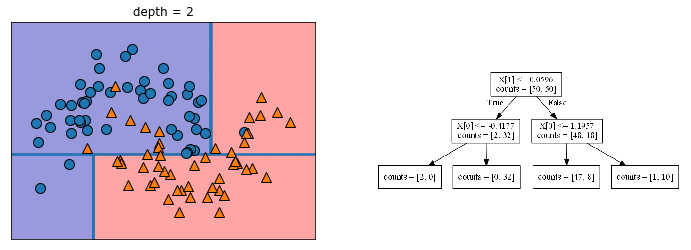

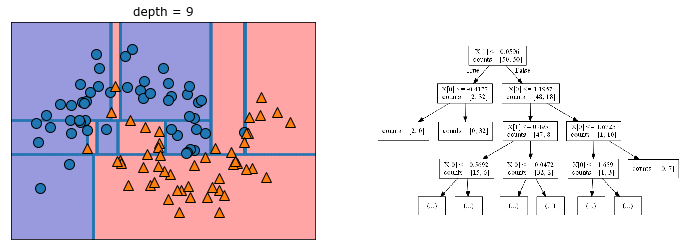

In [57]:
mglearn.plots.plot_tree_progressive()

#### Контроль сложности деревьев решений

In [58]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


In [59]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


#### Анализ деревьев решений

In [60]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

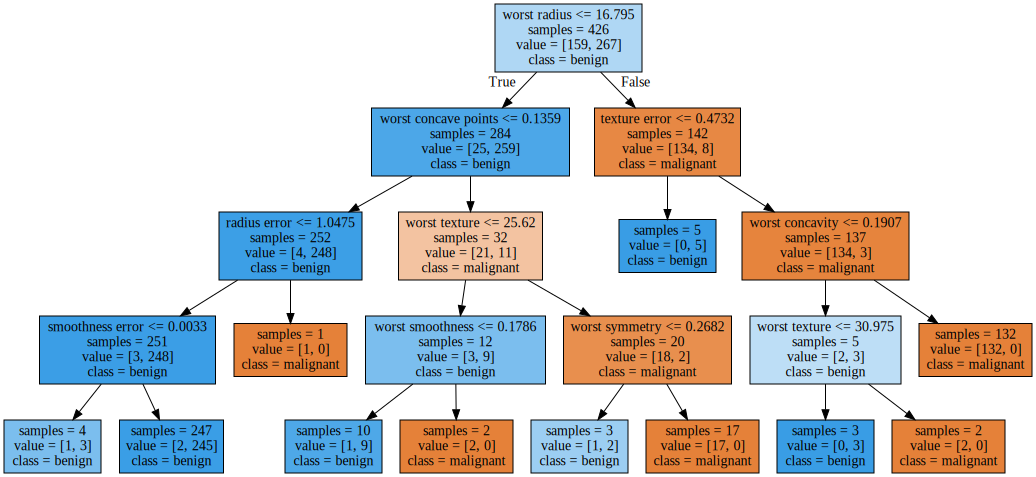

In [61]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### Важность признаков в деревьях

In [62]:
print("Важности признаков:\n{}".format(tree.feature_importances_))

Важности признаков:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


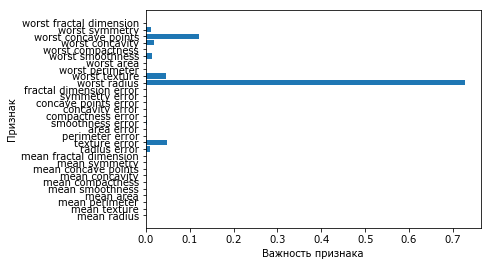

In [63]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")

plot_feature_importances_cancer(tree)

Feature importances: [ 0.  1.]


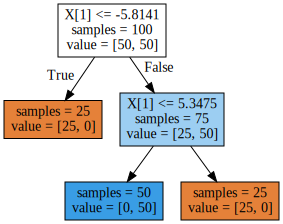

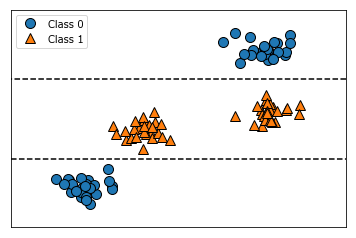

In [64]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

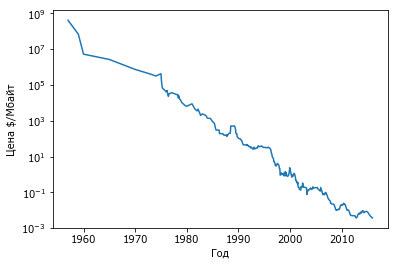

In [65]:
import pandas as pd
ram_prices = pd.read_csv("C:/Data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена $/Мбайт")

In [66]:
from sklearn.tree import DecisionTreeRegressor
# используем исторические данные для прогнозирования цен после 2000 года
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# прогнозируем цены по датам
X_train = data_train.date[:, np.newaxis]
# мы используем логпреобразование, что получить простую взаимосвязь между данными и откликом
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# прогнозируем по всем данным
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# экспоненцируем, чтобы обратить логарифмическое преобразование
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

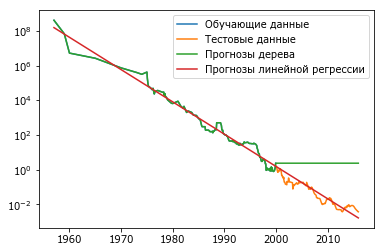

In [67]:
plt.semilogy(data_train.date, data_train.price, label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева")
plt.semilogy(ram_prices.date, price_lr, label="Прогнозы линейной регрессии")
plt.legend()

#### Преимущества, недостатки и параметры

### Ансамбли деревьев решений
#### Случайный лес
##### Построение случайного леса
##### Анализ случайного леса

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

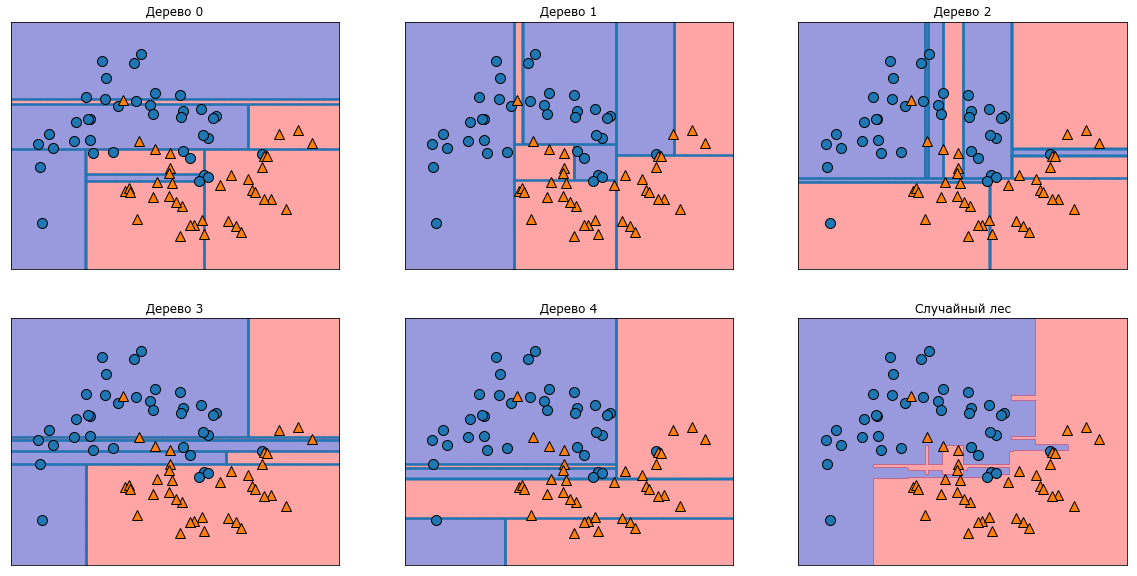

In [69]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Дерево {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Случайный лес")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.972


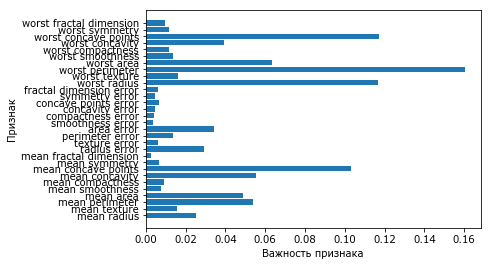

In [71]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(forest)

##### Преимущества, недостатки и параметры

#### Градиентный бустинг деревьев регрессии (машины градиентного бустинга)

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.958


In [73]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.972


In [74]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(gbrt.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.965


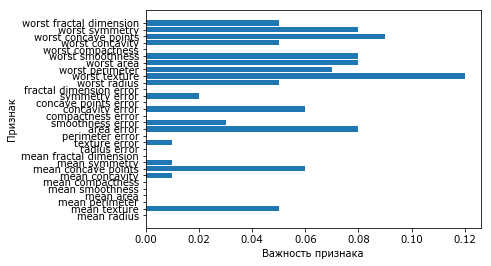

In [75]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(gbrt)

##### Преимущества, недостатки и параметры

### Ядерный метод опорных векторов
#### Линейные модели и нелинейные признаки 

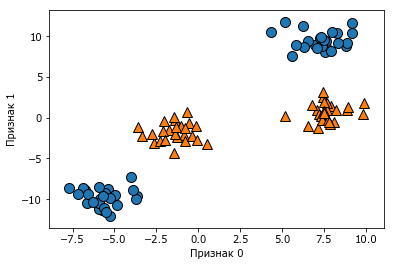

In [76]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

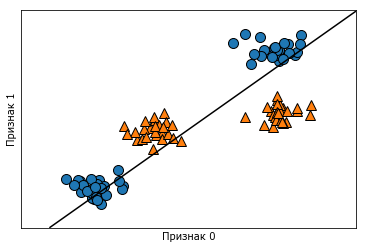

In [77]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

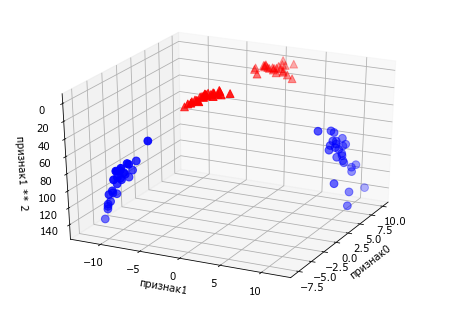

In [78]:
# добавляем второй признак, возведенный в квадрат
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# визуализируем в 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# сначала размещаем на графике все точки с y == 0, затем с y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)
ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2")

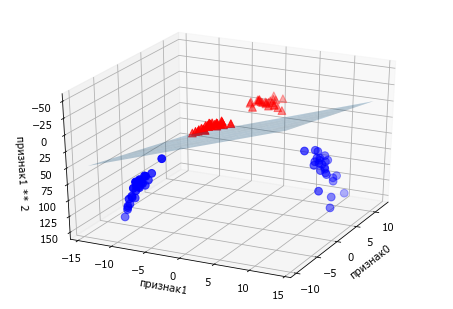

In [79]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# показать границу принятия решений линейной модели
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60)

ax.set_xlabel("признак0")
ax.set_ylabel("признак1")
ax.set_zlabel("признак1 ** 2")

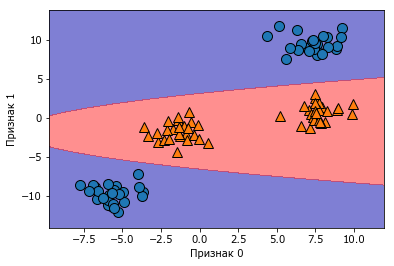

In [80]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

#### «Ядерный трюк» (kernel trick)
#### Понимание принципов работы SVM
\begin{align*}
\end{align*}

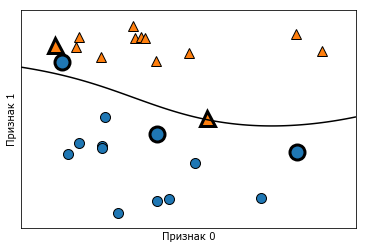

In [81]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# размещаем на графике опорные векторы
sv = svm.support_vectors_
# метки классов опорных векторов определяются знаком дуальных коэффициентов
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")


#### Настройка параметров SVM

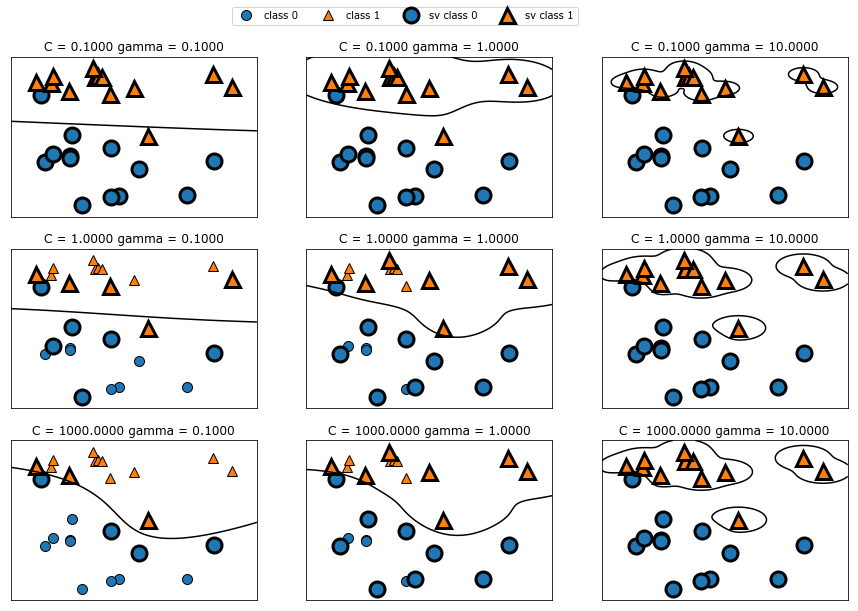

In [82]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(svc.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(svc.score(X_test, y_test)))

Правильность на обучающем наборе: 1.00
Правильность на тестовом наборе: 0.63


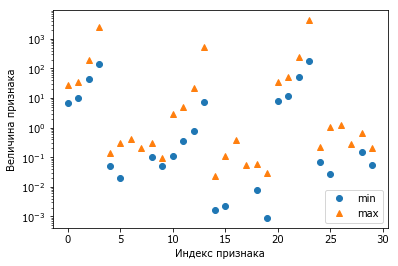

In [84]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Индекс признака")
plt.ylabel("Величина признака")
plt.yscale("log")

#### Предварительная обработка данных для SVM

In [85]:
# вычисляем минимальное значение для каждого признака обучающего набора
min_on_training = X_train.min(axis=0)
# вычисляем ширину диапазона для каждого признака (max - min) обучающего набора
range_on_training = (X_train - min_on_training).max(axis=0)

# вычитаем минимальное значение и затем делим на ширину диапазона
# min=0 и max=1 для каждого признака
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Минимальное значение для каждого признака\n{}".format(X_train_scaled.min(axis=0)))
print("Максимальное значение для каждого признака\n {}".format(X_train_scaled.max(axis=0)))

Минимальное значение для каждого признака
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Максимальное значение для каждого признака
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [86]:
# используем ТО ЖЕ САМОЕ преобразование для тестового набора,
# используя минимум и ширину диапазона из обучающего набора (см. главу 3)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [87]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.948
Правильность на тестовом наборе: 0.951


In [88]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.972


#### Премущества, недостатки и параметры

### Нейронные сети (глубокое обучение)
#### Модель нейронной сети

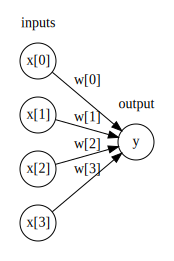

In [89]:
display(mglearn.plots.plot_logistic_regression_graph())

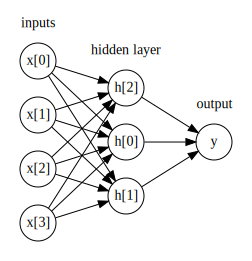

In [90]:
display(mglearn.plots.plot_single_hidden_layer_graph())

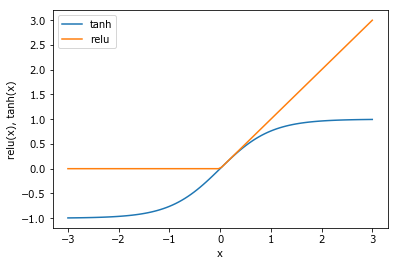

In [91]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

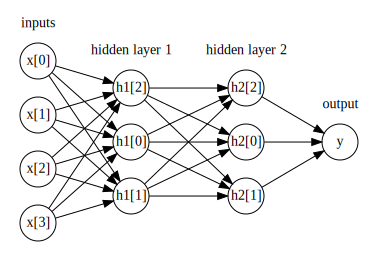

In [92]:
mglearn.plots.plot_two_hidden_layer_graph()

#### Настройка нейронных сетей

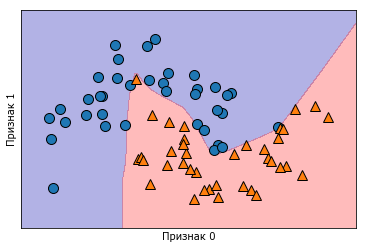

In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

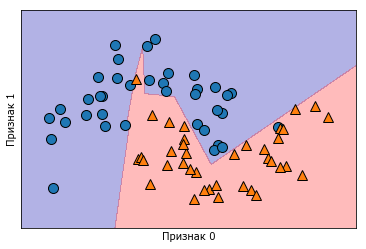

In [94]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1") 

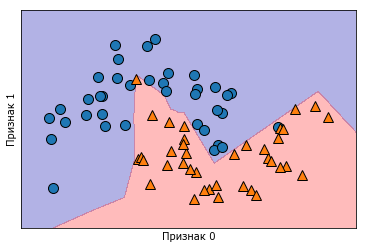

In [95]:
# использование двух скрытых слоев по 10 элементов в каждом
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

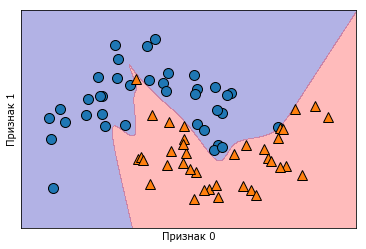

In [96]:
# использование двух скрытых слоев по 10 элементов в каждом, сейчас с функцией tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

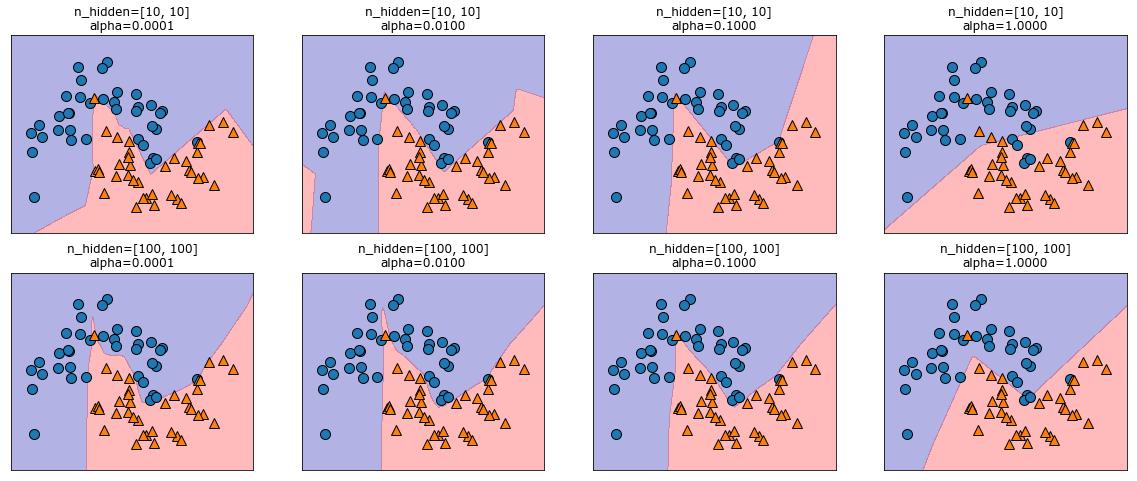

In [97]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

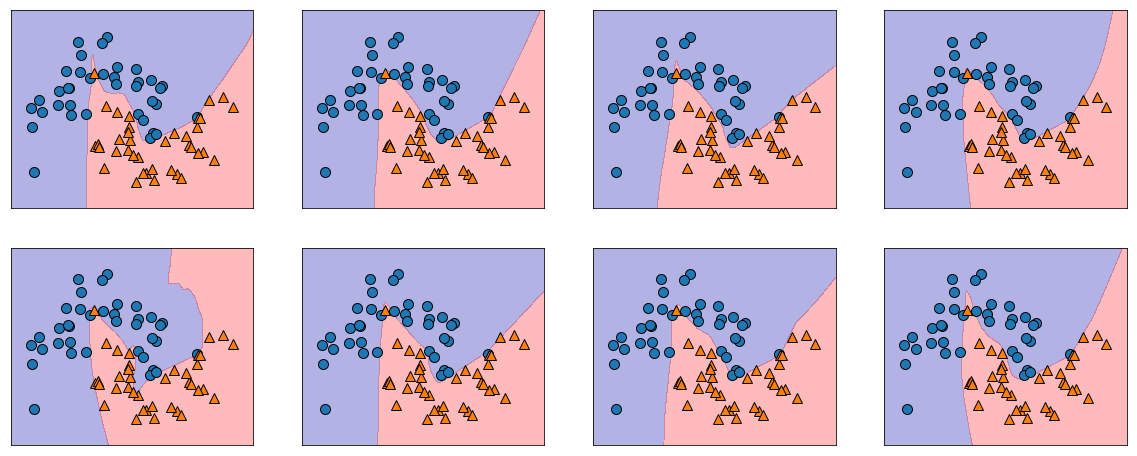

In [98]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [99]:
print("Максимальные значения характеристик в наборе cancer:\n{}".format(cancer.data.max(axis=0)))

Максимальные значения характеристик в наборе cancer:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.2f}".format(mlp.score(X_train, y_train)))
print("Правильности на тестовом наборе: {:.2f}".format(mlp.score(X_test, y_test)))

Правильность на обучающем наборе: 0.91
Правильности на тестовом наборе: 0.88


In [101]:
# вычисляем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train = X_train.std(axis=0)

# вычитаем среднее и затем умножаем на обратную величину стандартного отклонения
# mean=0 и std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение
# обучающего набора) для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 0.965


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [102]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.993
Правильность на тестовом наборе: 0.972


In [103]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.972


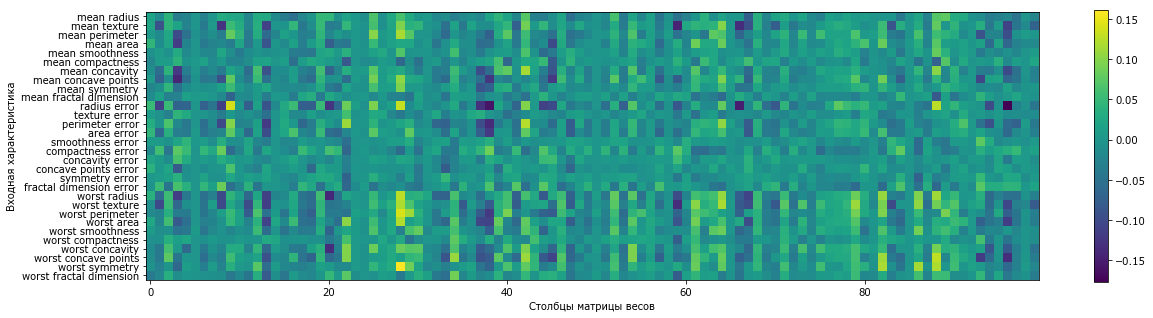

In [104]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Столбцы матрицы весов")
plt.ylabel("Входная характеристика")
plt.colorbar()

#### Преимущества, недостатки и параметры
##### Оценка сложности в нейронных сетях

### Оценки неопределенности для классификаторов

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# мы переименовываем классы в «blue» и «red» для удобства
y_named = np.array(["blue", "red"])[y]

# мы можем вызвать train_test_split с любым количеством массивов,
# все будут разбиты одинаковым образом
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)

# строим модель градиентного бустинга
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

#### Решающая функция

In [106]:
print("Форма массива X_test: {}".format(X_test.shape))
print("Форма решающей функции: {}".format(
     gbrt.decision_function(X_test).shape))

Форма массива X_test: (25, 2)
Форма решающей функции: (25,)


In [107]:
# выведем несколько первых элементов решающей функции
print("Решающая функция:\n{}".format(gbrt.decision_function(X_test)[:6]))

Решающая функция:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [108]:
print("Решающая функция с порогом отсечения:\n{}".format(
    gbrt.decision_function(X_test) > 0))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Решающая функция с порогом отсечения:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Прогнозы:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [109]:
# переделаем булевы значения True/False в 0 и 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# используем 0 и 1 в качестве индексов атрибута classes_
pred = gbrt.classes_[greater_zero]
# pred идентичен выводу gbrt.predict
print("pred идентичен прогнозам: {}".format(
    np.all(pred == gbrt.predict(X_test))))

pred идентичен прогнозам: True


In [110]:
decision_function = gbrt.decision_function(X_test)
print("Решающая граница минимум: {:.2f} максимум: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

Решающая граница минимум: -7.69 максимум: 4.29


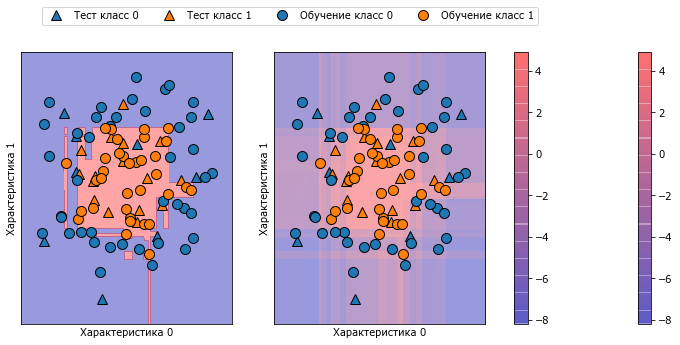

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # размещаем на графике точки обучающего и тестового наборов
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Характеристика 0")
    ax.set_ylabel("Характеристика 1")
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(["Тест класс 0", "Тест класс 1", "Обучение класс 0",
                    "Обучение класс 1"], ncol=4, loc=(.1, 1.1))

#### Прогнозирование вероятностей

In [112]:
print("Форма вероятностей: {}".format(gbrt.predict_proba(X_test).shape))

Форма вероятностей: (25, 2)


In [113]:
# выведем первые несколько элементов predict_proba
print("Спрогнозированные вероятности:\n{}".format(
    gbrt.predict_proba(X_test[:6])))

Спрогнозированные вероятности:
[[ 0.01573626  0.98426374]
 [ 0.84575649  0.15424351]
 [ 0.98112869  0.01887131]
 [ 0.97406775  0.02593225]
 [ 0.01352142  0.98647858]
 [ 0.02504637  0.97495363]]


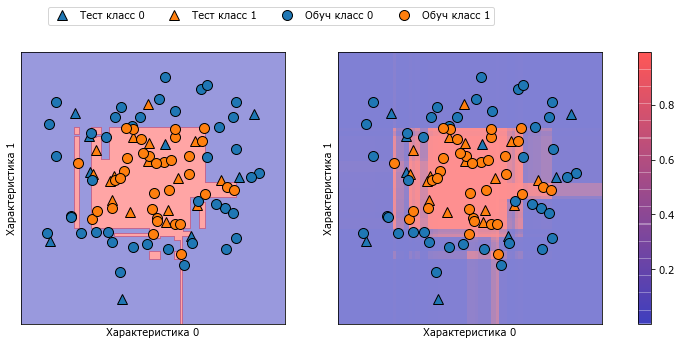

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # размещаем на графике точки обучающего и тестового наборов
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Характеристика 0")
    ax.set_ylabel("Характеристика 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Тест класс 0", "Тест класс 1", "Обуч класс 0",
                "Обуч класс 1"], ncol=4, loc=(.1, 1.1))

![classifier_comparison](images/classifier_comparison.png)

#### Неопределенность в мультиклассовой классификации

In [115]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [116]:
print("Форма решающей функции: {}".format(gbrt.decision_function(X_test).shape))
# выведем первые несколько элементов решающей функции
print("Решающая функция:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Форма решающей функции: (38, 3)
Решающая функция:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [117]:
print("Argmax решающей функции:\n{}".format(
      np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Argmax решающей функции:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [118]:
# выведем первые несколько элементов predict_proba
print("Спрогнозированные вероятности:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# покажем, что сумма значений в каждой строке равна 1
print("Суммы: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Спрогнозированные вероятности:
[[ 0.10664722  0.7840248   0.10932798]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10231173  0.10822274  0.78946553]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10825347  0.66344934  0.22829719]
 [ 0.78880668  0.10599243  0.10520089]]
Суммы: [ 1.  1.  1.  1.  1.  1.]


In [119]:
print("Argmax спрогнозированных вероятностей:\n{}".format(
    np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Argmax спрогнозированных вероятностей:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [120]:
logreg = LogisticRegression()

# представим каждое целевое значение названием класса в наборе iris
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("уникальные классы в обучающем наборе: {}".format(logreg.classes_))
print("прогнозы: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax решающей функции: {}".format(argmax_dec_func[:10]))
print("argmax объединенный с классами_: {}".format(
        logreg.classes_[argmax_dec_func][:10]))

уникальные классы в обучающем наборе: ['setosa' 'versicolor' 'virginica']
прогнозы: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax решающей функции: [1 0 2 1 1 0 1 2 1 1]
argmax объединенный с классами_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


### Выводы и перспективы